<a href="https://colab.research.google.com/github/jeanmacedus-crypto/Testando-rela-es-com-regress-o-linear/blob/main/Testando_rela%C3%A7oes_com_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desta vez, analisamos um projeto que visava estabelecer o preço de venda de uma casa. E não só isso, entendemos quais eram os fatores que mais influenciavam na definição desse preço.Entendemos o efeito dessas variáveis explicativas para, então, determinar um preço de venda para as casas.

Utilizamos, inclusive, uma metodologia dentro da Ciência de Dados, que é a regressão linear, para atingir esse objetivo de negócio.

Lemos um dataset e analisar de forma exploratória quais fatores poderiam explicar melhor o preço de venda. Inclusive, ajustamos um modelo de regressão linear simples com uma variável explicativa, que era a área do primeiro andar, explicando, então, esse preço.

Analisamos esse modelo, precificamos casas e também realizamos outros procedimentos comuns dentro do Machine Learning (Aprendizado de Máquina), como, por exemplo, o treino e o teste, para ter um modelo capaz de generalizar. Ou seja, precificar casas que não estavam ali dentro do treinamento do nosso modelo.

Percebemos também que esse modelo não explicava totalmente o preço das casas através do R², que deu em torno de 37%. Então, adicionamos outros fatores para aumentar a explicabilidade desse modelo. Inclusive, treinamos três modelos e os comparamos de forma manual, escolhendo um mais próximo do que precisávamos para estabelecer o preço de venda das casas.

Com o modelo escolhido, precificamos uma casa que estava ali com as suas características e também diversas outras casas de uma vez, para entregar para uma possível corretora.

E, no final, analisamos essa nossa ferramenta de precificação, o modelo 3. Entendemos, então, os resíduos, a questão de homoscedasticidade, e entendemos qual era a diferença e limitações entre os preços observados e aqueles precificados com o nosso modelo.

In [ ]:
import pandas as pd

In [ ]:
# Lendo dados
dados = pd.read_csv("/content/Preços_de_casas.csv")

In [ ]:
# Quais os fatores coletados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
dados = dados.drop(columns = 'Id')

In [ ]:
# correlação
corr = dados.corr()

In [ ]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


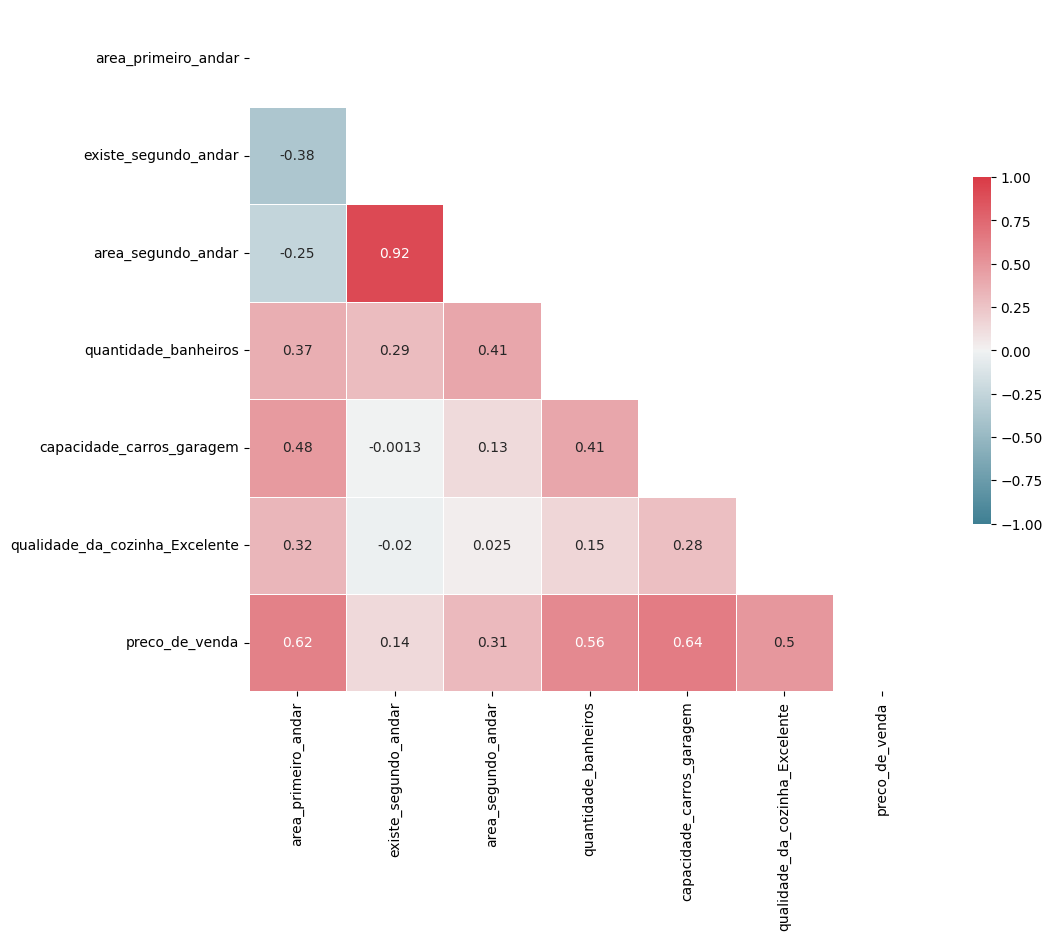

In [ ]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Lendo dados
dados = pd.read_csv("/content/Preços_de_casas.csv")
dados = dados.drop(columns = "Id")

# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

Text(0, 0.5, 'Preço de venda')

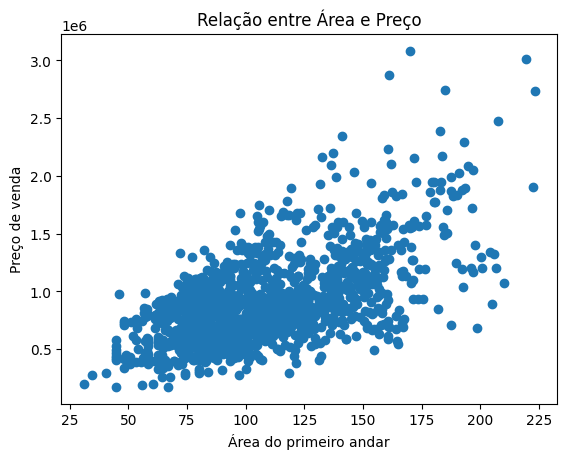

In [ ]:
# Como é a relação entre área construída e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title('Relação entre Área e Preço')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')

Text(0, 0.5, 'Preço de venda')

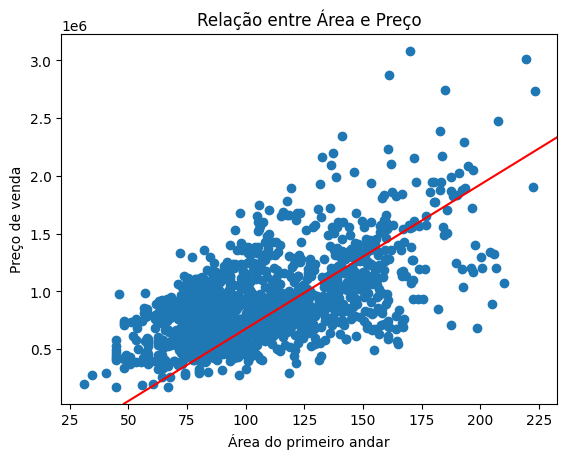

In [ ]:
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (66, 250000), xy2 = (190,1800000), color = "red")
plt.title('Relação entre Área e Preço')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')

In [ ]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#definindo y e x
y = dados['preco_de_venda']
x = dados.drop(columns = 'preco_de_venda')

In [ ]:
#aplicando o split do y e x
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state= 230)

In [ ]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train)
df_train['preco_de_venda'] = Y_train

In [ ]:
#import ols
from statsmodels.formula.api import ols

In [ ]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

In [ ]:
# visualizando os parametros
modelo_0.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


In [ ]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          2.22e-105
Time:                        08:06:31   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

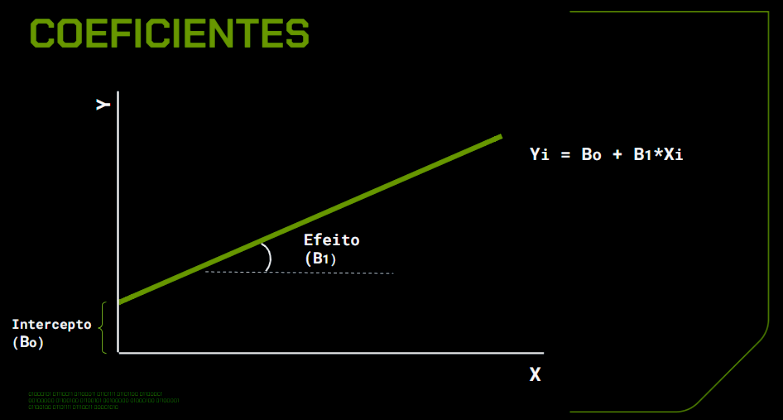

In [ ]:
# observando o R²
modelo_0.rsquared

np.float64(0.37728010994297867)

In [ ]:
# Quais são os resíduos
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


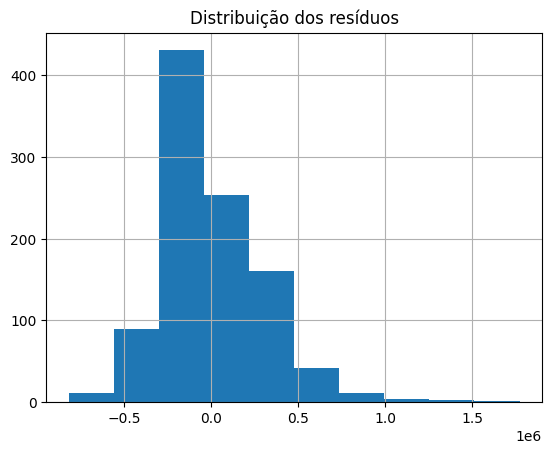

In [ ]:
# Como eles estão distribuídos
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

In [ ]:
# definindo o y previsto
y_predict = modelo_0.predict(X_test)

In [ ]:
# importando o r2 score
from sklearn.metrics import r2_score

In [ ]:
#printando o R²
print("R²: ", r2_score(Y_test,y_predict))

R²:  0.38530928723202407


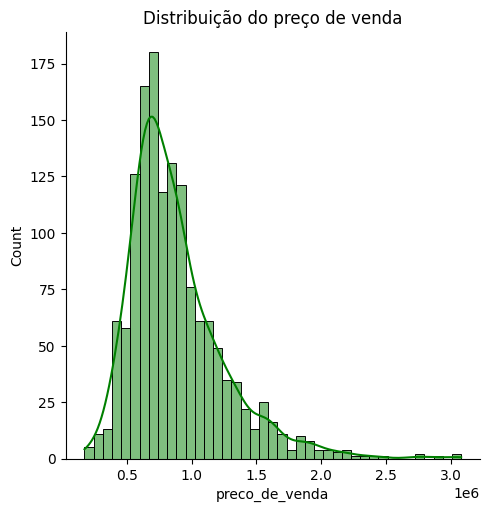

In [ ]:
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

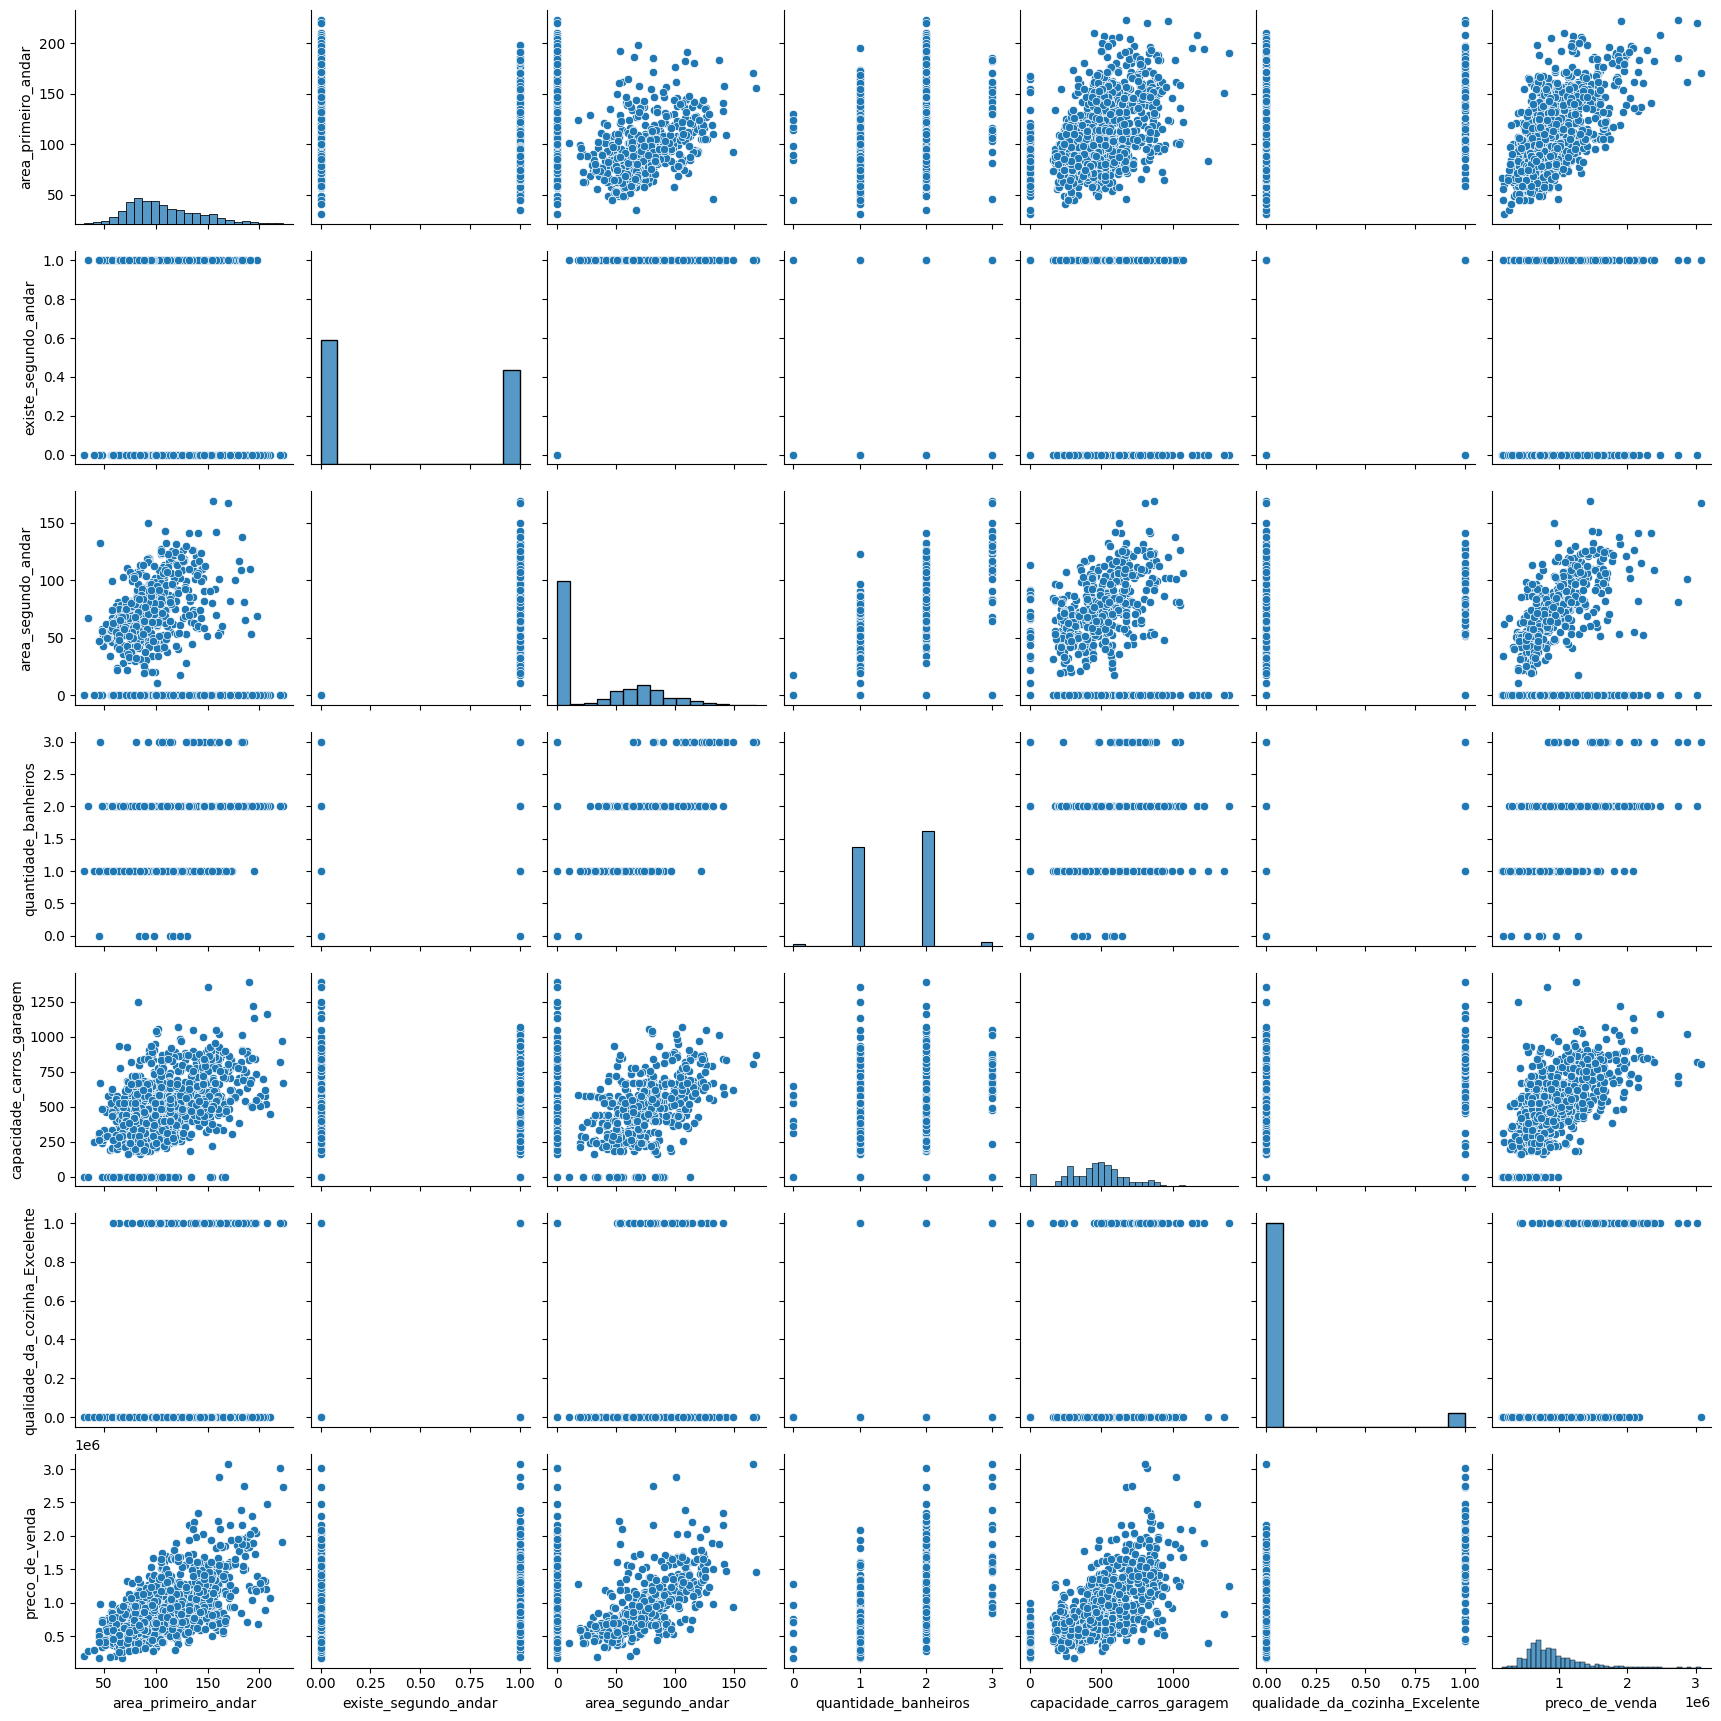

In [ ]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [ ]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

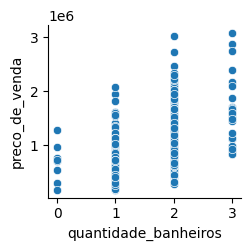

In [ ]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = 'quantidade_banheiros')

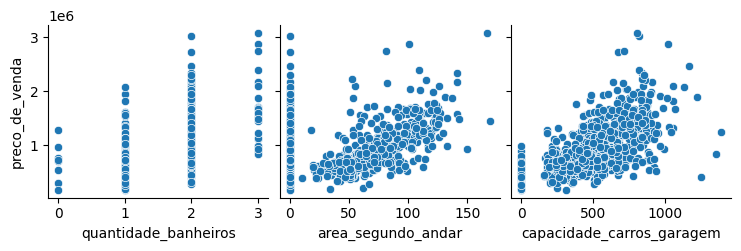

In [ ]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'])

In [ ]:
# importando a api do statsmodels
import statsmodels.api as sm

In [ ]:
# adicionando o constante
X_train = sm.add_constant(X_train)

In [ ]:
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [ ]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          2.79e-289
Time:                        08:06:45   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          1.93e-264
Time:                        08:06:45   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          4.15e-227
Time:                        08:06:45   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


In [ ]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


In [ ]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


In [ ]:
X_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [ ]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


In [ ]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [ ]:
# Prevendo com o modelo_3
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente' ]])

In [ ]:
# Qual o R² da previsão?
modelo_3.rsquared

np.float64(0.6511289354898803)

In [ ]:
# Qual o R² do treino?
print("R²: ", r2_score(Y_test, predict_3))

R²:  0.6432078074497706


![image.png](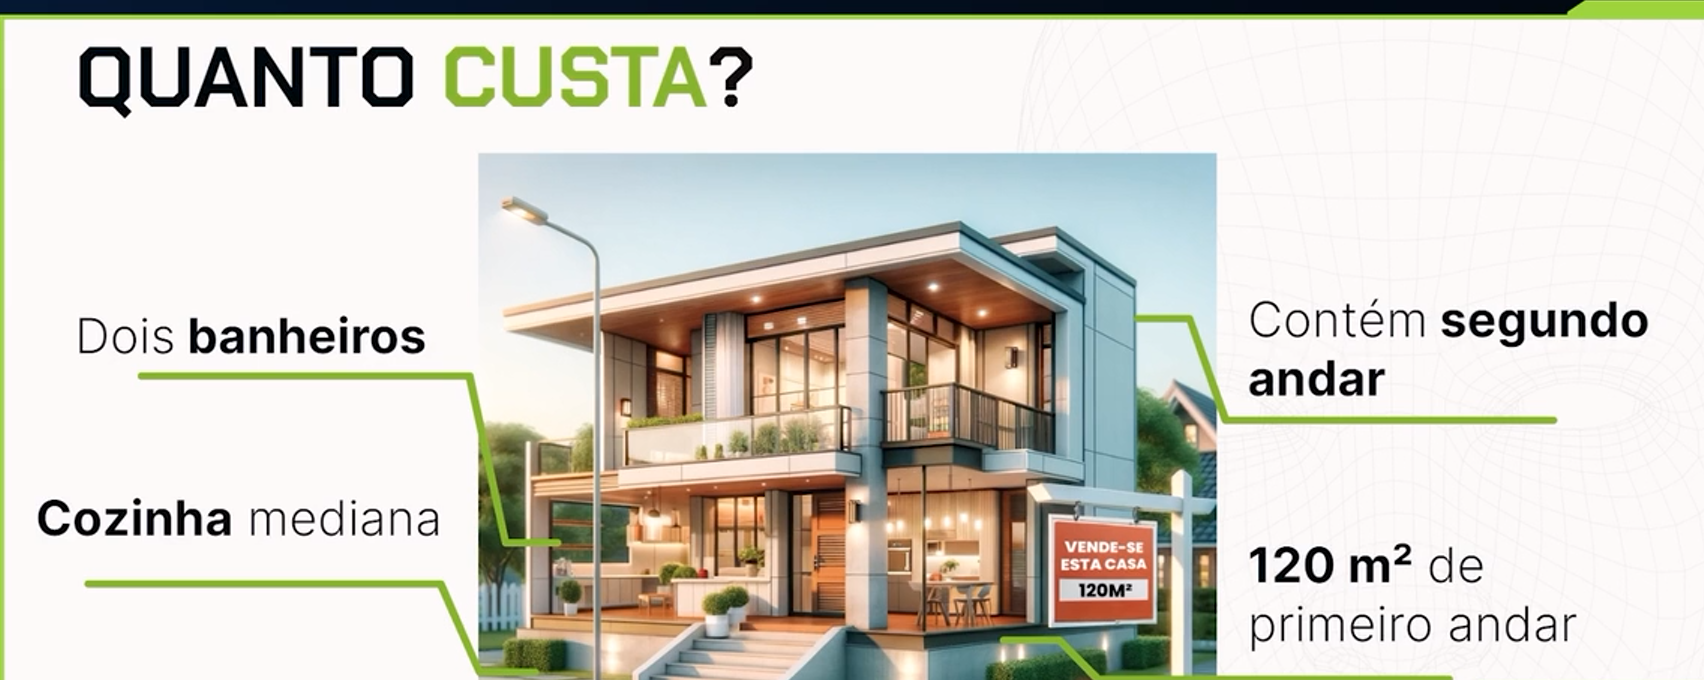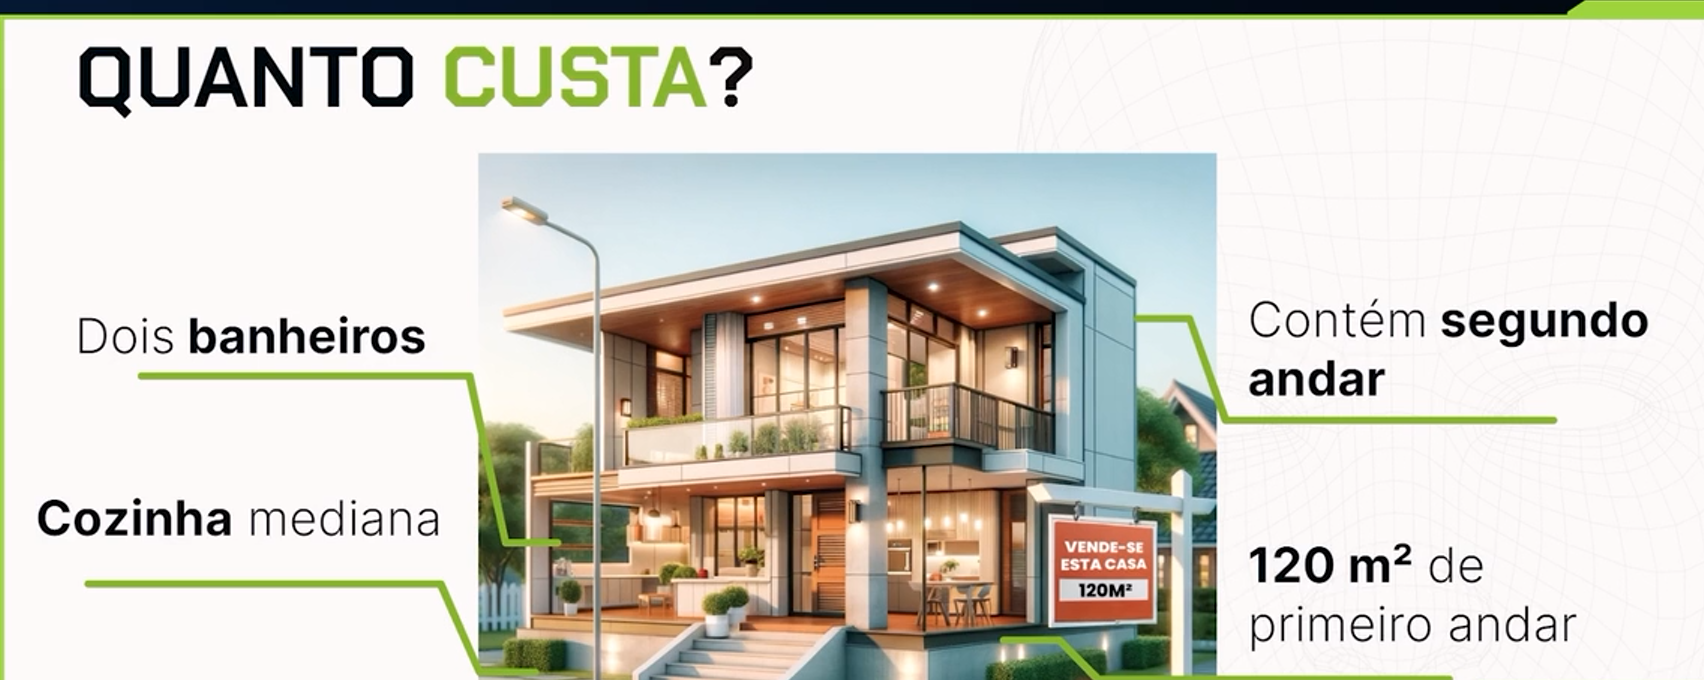)

In [ ]:
#novo imovel

novo_imovel = pd.DataFrame({'const': [1],
                            'area_primeiro_andar': [120],
                            'existe_segundo_andar': [1],
                            'quantidade_banheiros': [2],
                            'qualidade_da_cozinha_Excelente': [0]})

In [ ]:
# Qual o preço desse imóvel com o modelo_0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,968146.285305


In [ ]:
# Qual o preço desse imóvel com o modelo_3?
print(modelo_3.predict(novo_imovel)[0])

1123758.2426020515


In [ ]:
# Lendo várias casas
novas_casas = pd.read_csv("/content/Novas_casas.csv", sep = ";")

In [ ]:
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [ ]:
novas_casas = novas_casas.drop(columns="Casa")

In [ ]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [ ]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06


para estimar o preço de uma casa com as seguintes características:

1 banheiro

Área 98m²

Não contém segundo andar

Qualidade da cozinha excelente

In [ ]:
# df nova casa

novo_imovel_2 = pd.DataFrame({'const': [1],
                            'area_primeiro_andar': [98],
                            'existe_segundo_andar': [0],
                            'quantidade_banheiros': [1],
                            'qualidade_da_cozinha_Excelente': [1]})

In [ ]:
# Qual o preço desse imóvel com o modelo_0?
modelo_0.predict(novo_imovel_2['area_primeiro_andar'])

,0
0,818686.169194


In [ ]:
# Qual o preço desse imóvel com o modelo_3?
print(modelo_3.predict(novo_imovel_2)[0])

1063173.8519646404


In [ ]:
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_3, arquivo)

In [ ]:
# Carregar o modelo de volta do arquivo
with open(nome_arquivo, 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [ ]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [ ]:
vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativas_3

vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


In [ ]:
y_previsto_train =  modelo_3.predict(X_train[explicativas_3])

In [ ]:
fig = px.scatter(x=y_previsto_train, y=Y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [ ]:
#residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

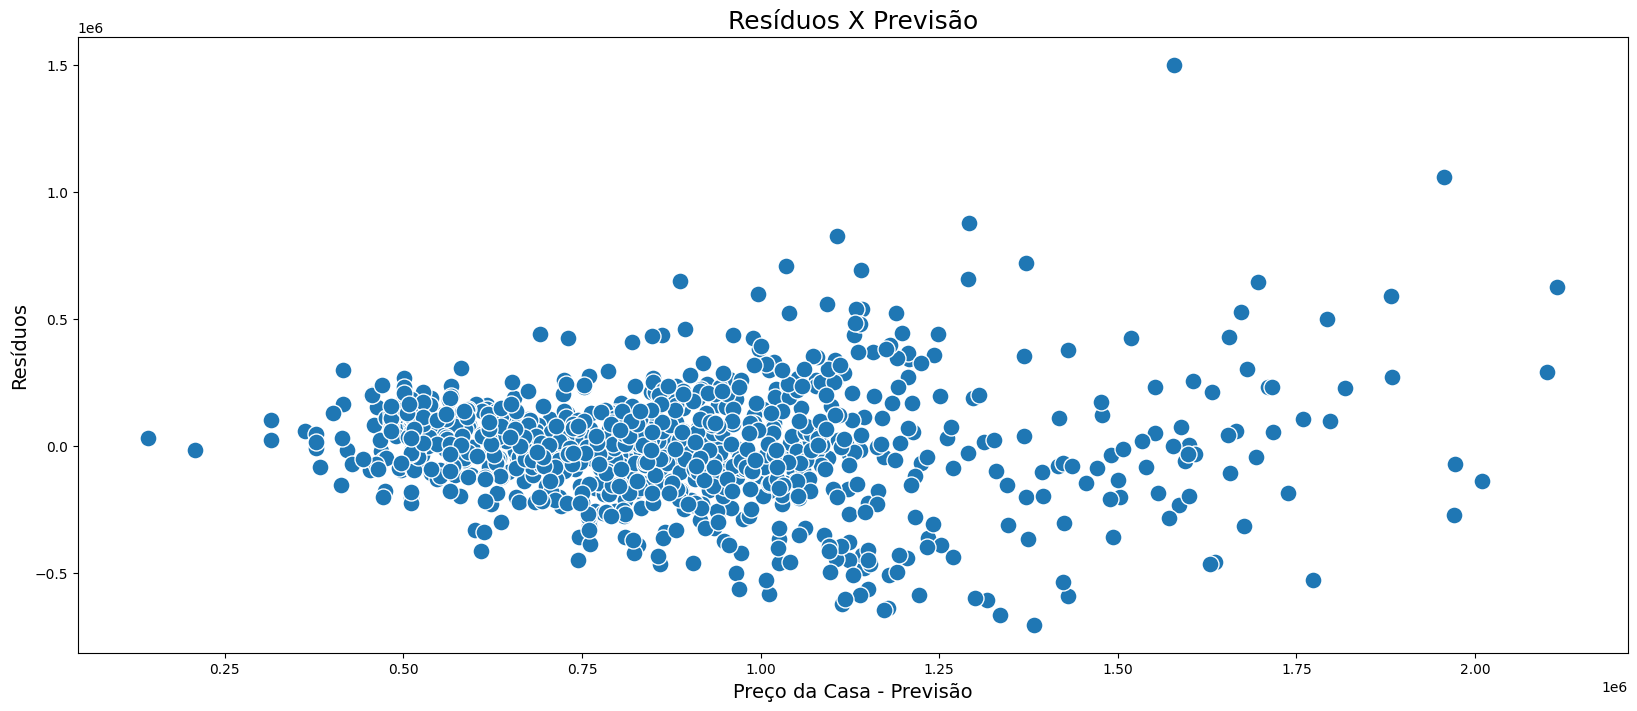

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax